
# Twitter Sentiment Analysis


### Objective:

Create a machine learning model that can classify the general sentiment of any given tweet as negative, neutral, or positive.


### Methods:

* Classification-based model
* Supervised learning
* Trial and error

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import re
import string
import nltk
import warnings

warnings.filterwarnings('ignore')


## Load in Data

### Things to keep in mind:

* "sentiment" category in dataset ranges from 0 - 4
* 0 = Negative, 2 = Neutral, 4 = Positive
* No examples for "neutral" (as far as I could tell)

In [2]:
twitter_data = pd.read_csv('data/twitter_data.csv', encoding='latin1')
twitter_data.rename(columns={'0':'sentiment', '1467810369':'id', 'Mon Apr 06 22:19:45 PDT 2009':'date', 'NO_QUERY':'flag', '_TheSpecialOne_':'user', "@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D":"text"}, inplace=True)
twitter_data.head()

,sentiment,id,date,flag,user,text
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


## Clean and Preprocess Data

### _Check for null values_

In [3]:
twitter_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599999 entries, 0 to 1599998
Data columns (total 6 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   sentiment  1599999 non-null  int64 
 1   id         1599999 non-null  int64 
 2   date       1599999 non-null  object
 3   flag       1599999 non-null  object
 4   user       1599999 non-null  object
 5   text       1599999 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


### _Remove patterns that may affect training_

In [4]:
def clean_text(text):
    """Remove uncessary patterns from text"""
    text = re.sub(r'@[A-Za-z0-9]+', '', text) # Removes '@' mentions
    text = re.sub(r'RT[\s]+', '', text) # Removes 'RT' retweet
    text = re.sub(r'https?:\/\/\S+', '', text) # Removes hyperlinks
    text = re.sub(r'[^a-zA-Z#]', ' ', text) # Removes special characters, numbers, and punctuation
    
    # Removes words with less than three letters
    text = ' '.join([word for word in text.split() if len(word) > 2])
    
    return text

clean_twitter_data = twitter_data.copy()
clean_twitter_data['text'] = clean_twitter_data['text'].apply(lambda text: clean_text(text))
clean_twitter_data.head()


,sentiment,id,date,flag,user,text
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,upset that can update his Facebook texting and...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,dived many times for the ball Managed save The...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,whole body feels itchy and like its fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,not behaving all mad why here because can see ...
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,not the whole crew


### _Tokenize and stem words_

In [5]:
from nltk.stem.porter import PorterStemmer

def tokenize_text(text):
    """Tokenize and stem words in text"""
    text = text.split()
    stemmer = PorterStemmer()
    text = [stemmer.stem(word) for word in text]
    text = ' '.join(text)
    
    return text

tokenized_tweets = clean_twitter_data['text'].apply(lambda text: tokenize_text(text))
tokenized_tweets.head()

0    upset that can updat hi facebook text and migh...
1    dive mani time for the ball manag save the res...
2               whole bodi feel itchi and like it fire
3    not behav all mad whi here becaus can see you ...
4                                   not the whole crew
Name: text, dtype: object

In [6]:
clean_twitter_data['text'] = tokenized_tweets
clean_twitter_data.head()

,sentiment,id,date,flag,user,text
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,upset that can updat hi facebook text and migh...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,dive mani time for the ball manag save the res...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,whole bodi feel itchi and like it fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,not behav all mad whi here becaus can see you ...
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,not the whole crew


## Visualize Data

## Positive Tweets

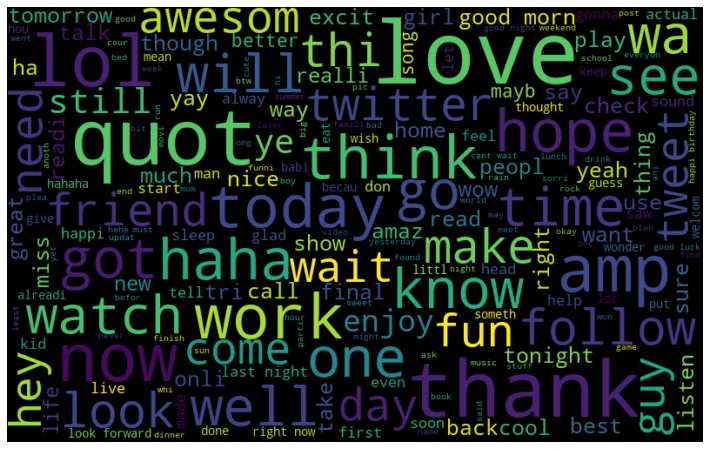

In [7]:
from wordcloud import WordCloud

positive_tweets = ' '.join(tweet for tweet in clean_twitter_data['text'][clean_twitter_data['sentiment'] == 4])
wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(positive_tweets)

plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## Negative Tweets

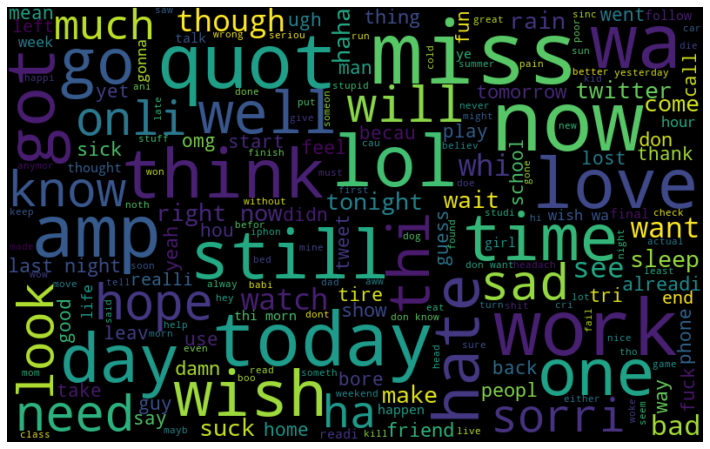

In [8]:
negative_tweets = ' '.join(tweet for tweet in clean_twitter_data['text'][clean_twitter_data['sentiment'] == 0])
wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(negative_tweets)

plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [9]:
hashtag_twitter_data = twitter_data['text'].copy()
hashtags = [re.findall(r'#(\w+)', tweet) for tweet in hashtag_twitter_data]
hashtags = [hashtag for hashtag in hashtags if hashtag != []]
hashtags[:10]

[['itm'],
 ['therapyfail'],
 ['fb'],
 ['TTSC', '24'],
 ['gayforpeavy'],
 ['FML'],
 ['3'],
 ['camerafail'],
 ['fb'],
 ['travian']]

## Feature Extraction

In [10]:
from sklearn.feature_extraction.text import CountVectorizer

bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=2500)
X = bow_vectorizer.fit_transform(clean_twitter_data['text'])
y = clean_twitter_data['sentiment']

## Generating Train and Test Set

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.10)

## Model Training

In [12]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

## Measuring Performance

In [13]:
from sklearn.metrics import f1_score, accuracy_score

predictions = model.predict(X_test)

f1 = f1_score(y_test, predictions, average='macro')
accuracy = accuracy_score(y_test, predictions)

print(f'F1: {f1}')
print(f'Accuracy: {accuracy}')

F1: 0.7774503652668516
Accuracy: 0.777625


## Takeaways

* Data is **VERY** important
* But so are model parameters

## Potential Drawbacks

* Data lacked examples of "neutral" tweets
* More (or rather better) preprocessing
* Poor feature extraction